#**Guía de Persistencia de Datos**

Esta guía está dirigida a estudiantes de ingeniería electrónica con fundamentos en estructuras de datos. Se busca proporcionar un enfoque práctico y reflexivo sobre la importancia de almacenar datos de forma permanente, utilizando archivos `.txt`, `.json` y `.csv`, que son ampliamente usados en sistemas embebidos, registro de sensores, monitoreo y otras aplicaciones reales.

---

**Problema incial:**
*Supón que necesitas registrar datos de sensores en un sistema embebido, o anotar tus observaciones diarias durante un experimento de laboratorio. Esos datos no pueden quedar en memoria volátil. Necesitas guardarlos, procesarlos y reutilizarlos. La persistencia de datos es esencial para llevar historiales, hacer estadísticas, generar reportes y validar comportamientos en el tiempo.*

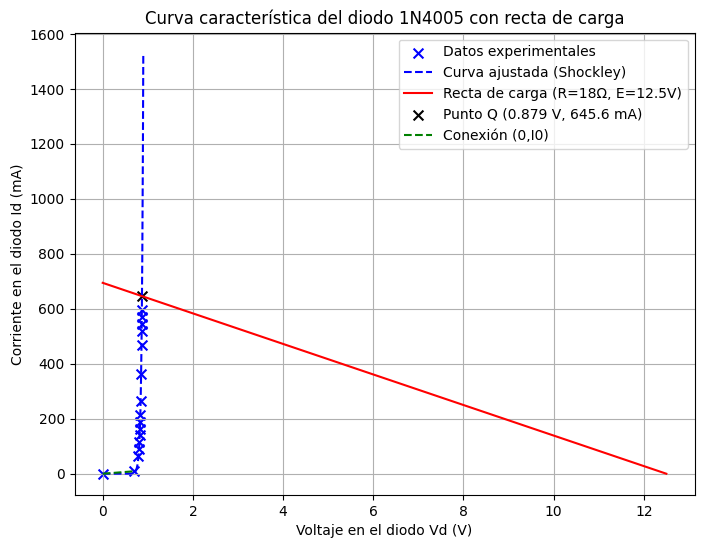

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fill data, listas con los datos para graficar
Vf = np.array([0.8, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6, 8, 10, 11, 11.5, 12, 12.5])  # Voltaje fuente
Vd = np.array([0.7, 0.79, 0.8, 0.81, 0.82, 0.825, 0.829, 0.832, 0.844, 0.855, 0.861, 0.865, 0.865, 0.866, 0.867])  # Voltaje diodo
Id_mA = np.array([9, 64, 90, 116, 142, 164, 188, 214, 266, 364, 468, 519, 543, 569, 595])  # Corriente en mA
Id = Id_mA / 1000  # convertir a A

# Insertar el punto (0,0)
Vd = np.insert(Vd, 0, 0)
Id = np.insert(Id, 0, 0)

# ajuste shockley
def diode_eq(V, Is, nVt):
    return Is * (np.exp(V / nVt) - 1)

params, _ = curve_fit(diode_eq, Vd[1:], Id[1:], p0=[1e-9, 0.03], maxfev=10000)
Is, nVt = params

# Curva ajustada
V_fit = np.linspace(0, 0.9, 200)
I_fit = diode_eq(V_fit, Is, nVt)

# recta de ccarga
R = 18   # Ohmios
E = 12.5 # Voltios (fuente máxima)

V_line = np.linspace(0, E, 200)
I_line = (E - V_line) / R  # Ecuación de la recta de carga

# q(intersección)
diff = np.abs(diode_eq(V_line, Is, nVt) - I_line)
idx = np.argmin(diff)
Vq, Iq = V_line[idx], I_line[idx]

# gráfica
plt.figure(figsize=(8,6))
plt.scatter(Vd, Id*1000, color="blue", label="Datos experimentales", marker='x', s=50)
plt.plot(V_fit, I_fit*1000, "b--", label="Curva ajustada (Shockley)")
plt.plot(V_line, I_line*1000, "r-", label="Recta de carga (R=18Ω, E=12.5V)")
plt.scatter(Vq, Iq*1000, color="black", marker = 'x', s=50, label=f"Punto Q ({Vq:.3f} V, {Iq*1000:.1f} mA)")
plt.plot([0, Vd[1]], [0, Id[1]*1000], "g--", label=(f"Conexión (0,0)"))

plt.title("Curva característica del diodo 1N4005 con recta de carga")
plt.xlabel("Voltaje en el diodo Vd (V)")
plt.ylabel("Corriente en el diodo Id (mA)")
plt.legend()
plt.grid(True)
plt.show()


# Parte 1: Archivos de Texto Plano (.txt)

## **Introducción a TXT**
Un archivo `.txt` es un archivo de texto plano que contiene únicamente caracteres codificados (normalmente en ASCII o UTF-8) sin ningún tipo de formato (negritas, colores, imágenes, etc.). Es ampliamente utilizado para guardar información de forma sencilla, legible y fácilmente manipulable por humanos o por programas.

En Python, los archivos `.txt` permiten leer, escribir o modificar datos mediante funciones integradas que simplifican enormemente la tarea de persistencia de datos. Esto lo convierte en una herramienta básica para registrar eventos, guardar resultados de sensores, o almacenar logs de programas de control electrónico.Son ideales para registros simples como logs, notas, instrucciones o comentarios.



## **Sintaxis básica**

Cuando se trabaja con archivos en Python, la función principal que se utiliza es:
```
  open(nombre_archivo, modo)
```
El segundo parámetro (modo) indica **cómo se abrirá el archivo**. Los modos más comunes son:

#### ***Modo "r" — Lectura***
Abre un archivo existente para leerlo. Si el archivo no existe, se lanza una excepción `FileNotFoundError`.

Por ejemplo:


In [ ]:
with open("datos.txt", "r", encoding="utf-8") as archivo:
    contenido = archivo.read()
    print(contenido)

En el anterior código:

`with open("datos.txt", "r", encoding="utf-8") as archivo:`
Abre el archivo `datos.txt` en modo de lectura `"r"` y `encoding="utf-8"` especifica la codificación de caracteres que se utilizará para el archivo. `utf-8` es una codificación estándar y muy recomendada que puede manejar una amplia gama de caracteres de diferentes idiomas.

Además, el uso de `with` asegura que el archivo se cierre automáticamente al terminar.

`with ... as ...:` Es una construcción en Python conocida como el "gestor de contexto" `context manager`. Su principal beneficio en el manejo de archivos es que garantiza que el archivo se cerrará correctamente después de que el bloque de código dentro del with se haya ejecutado, incluso si ocurren errores.

Después de que el bloque `with` termina (ya sea normalmente o debido a una excepción), el gestor de contexto se encarga automáticamente de cerrar el archivo, incluso si no se llamó explícitamente a `f.close()`.

`contenido = archivo.read()` Lee todo el contenido del archivo como una única cadena de texto y lo guarda en la variable contenido.

`print(contenido)` Imprime en pantalla el contenido leído.

#### ***Modo "w" — Escritura (sobrescribe)***
Crea un archivo nuevo o sobrescribe el archivo existente. Si ya existía, borra su contenido.

Por ejemplo:

In [ ]:
with open("registro.txt", "w") as f:
    f.write("Sensor activado.\nVoltaje = 3.3V")

Como el resultado de la función `open("registro.txt", "w")` es un objeto que representa el archivo abierto.

`as f:` asigna este objeto de archivo a la variable llamada `f`.

A partir de este punto, dentro del bloque de código indentado debajo de la línea `with open(...) as f:`, se puede utilizar la variable `f` para interactuar con el archivo, tal como se hace con `f.write(...)` para escribir datos en el archivo.

Comparandolo con el ejemplo anterior se puede observar que no necesariamente debe utilizarse `encoding="utf-8"` como argumento, es una práctica recomendada por la amplia gama de carateres que maneja.

#### ***Modo "a" — Agregar (append)***
Crea un archivo nuevo o sobrescribe el archivo existente. Si ya existía, borra su contenido.

Por ejemplo:

In [ ]:
with open("datos.txt", "a") as dt:
    dt.write("Nueva línea de datos registrada.\n")

`"a"` es el modo append, se abre el archivo para agregar contenido al final sin borrar nada.

Y `df.write(...)` agrega esa línea al final del archivo.

#### ***Modo "x" — Creación exclusiva***
Crea un nuevo archivo, pero si ya existe lanza un error `FileExistsError`.

Por ejemplo:

In [ ]:
try:
    with open("datos_nuevo.txt", "x", encoding="utf-8") as dn:
        dn.write("Creando archivo nuevo exclusivamente.")
except FileExistsError:
    print("El archivo ya existe.")

`try:` intenta ejecutar el bloque de código que le sigue. Si ocurre una excepción (un error) durante la ejecución de este bloque, Python buscará un bloque `except` que pueda manejar esa excepción.

`"x"` Es el modo de apertura exclusiva para creación. Tiene el siguiente comportamiento:
* Si el archivo `"datos_nuevo.txt"` no existe, se creará un nuevo archivo vacío y se abrirá para escritura con el uso de `dn.write(...)` escribe una línea en ese nuevo archivo.
* Si el archivo `"datos_nuevo.txt"` ya existe, la función `open()` lanzará una excepción de tipo `FileExistsError`y pasará al `except` del código, donde imprimirá `"El archivo ya existe."`


## **Leer línea por línea**

La lectura línea por línea es un principio muy importante, especialmente cuando trabajamos con archivos largos (por ejemplo, un log de miles de líneas, *un log es un archivo que contiene un registro cronológico de lo que ocurre dentro de un sistema operativo, una aplicación de software, un dispositivo de red o cualquier otro sistema electrónico.*).

Pero debe usarse con cuidad, pues leer todo el archivo de una vez puede ocupar mucha memoria.

En su forma más básica, se puede usar un bucle for sobre el archivo abierto:

In [ ]:
with open("registro.txt", "r") as r:
    for linea in fr:
        print(linea.strip()) #strip elimina saltos de linea al final

`for linea in fr:` recorre el archivo línea por línea, lo cual es eficiente para archivos grandes.

`linea.strip()` elimina espacios o saltos de línea `\n` al principio y al final de cada línea.

`print(...)` muestra la línea limpia.

Esto es especialmente útil si estás procesando datos provenientes de sensores, por ejemplo: una línea por cada muestra tomada por un sensor de humedad.

## **Manejo de errores**
En programación real, los errores pueden ocurrir por muchas razones, como que el archivo no exista, que no tengas permiso de lectura/escritura o que se interrumpe la conexión con el medio de almacenamiento.

Por eso, es buena práctica utilizar bloques `try-except` para manejar errores de forma controlada, como en ejemplo de la aplicación del modo `"x"`

Otro ejemplo puede ser este:

In [ ]:
try:
    with open("datos_sensor.txt", "r", encoding="utf-8") as ds:
        for linea in ds:
            print(linea.strip())
except FileNotFoundError:
    print("El archivo no fue encontrado.")
except PermissionError:
    print("No tienes permiso para abrir este archivo.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")


En este caso más amplio, lo primero que se va a ejecutar es el `try:` intenta abrir y leer el archivo. Donde `for linea in archivo:` recorre línea por línea el contenido y `print(linea.strip())` imprime cada línea, quitando el salto de línea final.

Si por algún motivo no es posible completar el `try`, se pueden exponer 3 maneras de atuar frente al error

`except FileNotFoundError:` captura error si el archivo no existe.

`except PermissionError:` captura error si no tienes permiso para abrir el archivo.

`except Exception as e: `captura cualquier otro error y lo muestra con su mensaje

##**Buenas prácticas**
Como se mencionaba anteriormente, se puede compilar código sin muchos elementos, sin embargo, con el fin de enrriquecer nuestro trabajo y plantear soluciones óptimas, se recomiendan las siguientes prácticas:
- Usar `with` para asegurar que el archivo se cierre correctamente.
- Validar existencia del archivo antes de lectura.
- Usar `strip()` para limpiar saltos de línea.
- Para el caso de uso de sensores, incluye fecha y hora para cada lectura.

Por ejemplo:

In [ ]:
from datetime import datetime

def registrar_humedad(humedad):
    ahora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    linea = f"{ahora} - Humedad: {humedad}%\n"
    with open("humedad_log.txt", "a", encoding="utf-8") as rh:
        rh.write(linea)

`from datetime import datetime` permite usar la hora y fecha actual.

`ahora = datetime.now().strftime(...)` obtiene la hora y la formatea en formato legible (ej. 2025-04-10 20:30:00).

`linea = f"..."` crea una cadena con la hora y el dato de humedad.

`open("humedad_log.txt", "a", ...)`: abre el archivo en modo agregar.

`rh.write(linea)` escribe la línea en el archivo con el dato de humedad y la hora.

## **Desafíos**
A manera e reto, propón un programa para dar solución a los siguientes planteamientos.
1. Implementar un buscador de palabras clave.
2. Registrar logs de errores de un sistema.

# Parte 2: Archivos JSON (.json)

## **Introducción a JSON**
Un archivo .json (JavaScript Object Notation) es un formato de texto ligero para almacenar y transportar datos estructurados, similar a los diccionarios en Python. Es ampliamente utilizado para la transmisión de datos entre cliente y servidor.

## **Estructura**
La estructura de un JSON, es parecida a un diccionario, a diferencia de un archivo plano, ofrece más organización ideal para manejo de muchas variables.
Como en el siguiente ejemplo

```
{
  "nombre": "Lucía",
  "edad": 25,
  "activo": true,
  "habilidades": ["Python", "HTML", "CSS"],
  "direccion": {
    "ciudad": "Bogotá",
    "pais": "Colombia"
  }
}
```
##**Sintaxis básica**

Python tiene una librería básica incorporada llamada `json` que permite manipular fácilmente este tipo de archivos. El programa a continunación muestra como convertir un diccionario a JSON.

Además, se utilizan tres modos ya mencionados, `"r"` `"w"` `"a"`



In [ ]:
import json

# Convertir de diccionario a JSON y guardar
diccionario = {
    "nombre": "Laura",
    "edad": 25
}

with open("archivo.json", "w", encoding="utf-8") as archivo:
    json.dump(diccionario, archivo)

# Leer y convertir de JSON a diccionario
with open("archivo.json", "r", encoding="utf-8") as archivo:
    datos = json.load(archivo)
    print(datos["nombre"])


La primera parte del código nos muestra como convertir un diccionario a un archivo JSON
```
diccionario = {
    "nombre": "Laura",
    "edad": 25
}
```
Se define un diccionario Python llamado diccionario. Este diccionario tiene dos pares clave-valor: La clave `"nombre"` con el valor `"Laura"` (un string).
La clave `"edad"` con el valor `25` (un entero)

```
with open("archivo.json", "w", encoding="utf-8") as archivo:
    json.dump(diccionario, archivo)
```
Utiliza los modos vistos anteriormente, en este caso abre el archivo llamado `"archivo.json"` en modo escritura (`"w"`)

`json.dump(diccionario, archivo`) Es la función clave del módulo json para convertir un objeto Python (en este caso, el diccionario "diccionario") a su representación en formato JSON y escribirlo en el archivo referenciado por la variable archivo.



---
Esta segunda parte nos permite leer el archivo creado anteriormente
```
with open("archivo.json", "r", encoding="utf-8") as archivo:
    datos = json.load(archivo)
    print(datos["nombre"])
```
`with open("archivo.json", "r", encoding="utf-8") as archivo:` Abre el mismo archivo `"archivo.json"` que se creó anteriormente, pero esta vez en modo lectura (`"r"`).

También se especifica la codificación `"utf-8"` para leer el contenido correctamente. El objeto del archivo se asigna a la variable archivo.

`datos = json.load(archivo)` Es otra función clave del módulo json. Lee el contenido del archivo JSON referenciado por archivo y lo convierte de nuevo a un objeto Python (en este caso, un diccionario). El diccionario resultante se guarda en la variable datos.

`print(datos["nombre"])` Accede al valor asociado con la clave `"nombre"` dentro del diccionario datos y lo imprime en la consola. En este caso, la salida será `"Laura"`.

## **Buenas prácticas**
- Validar estructura antes de guardar.
- Usar `indent` para mejorar legibilidad.
- Manejar excepciones con `try/except`.
en general las buenas prácticas no son algo exclusivo de la permanecnia de datos, si no de la programación en general.

## **Retos**
1. Leer un archivo JSON con múltiples registros.
2. Agregar nueva información y volver a guardar el archivo.

# Parte 3: Archivos CSV (.csv)

## **Introducción a CSV**
Un archivo CSV (Comma Separated Values) es un archivo de texto plano donde los datos están separados por comas y tiene formato tabular, donde cada línea representa una fila. Es muy usado en hojas de cálculo y exportaciones de bases de datos.

##**Estructura base de CSV (como hoja de cálculo)**


```
Nombre,Edad,Correo
Lucía,25,lucia@correo.com
Pedro,30,pedro@correo.com
```
Cada línea representa una fila. Cada valor está separado por comas (`,`) — o punto y coma (`;`) en algunos países.

## **Sintaxis básica**

###***Crear CSV***

In [ ]:
import csv
with open("datos.csv", "w", newline="") as dt:
    writer = csv.writer(dt)
    writer.writerow(["Hora", "Voltaje"])
    writer.writerow(["10:00", 3.3])

Como ya hemos visto, la primera parte abre un archivo llamado `"datos.csv"` en modo escritura (`"w"`)

`newline=""` es un argumento importante cuando se trabaja con archivos CSV en Python. Ayuda a evitar la inserción de líneas en blanco adicionales entre las filas escritas en el archivo CSV.

Diferentes sistemas operativos utilizan diferentes convenciones para los finales de línea, y `newline=""` asegura que el módulo csv controle el manejo de las nuevas líneas de manera consistente.

`writer = csv.writer(dt)` Crea un objeto writer utilizando la función `csv.writer`(). Este objeto writer es el que se utilizará para escribir datos en el archivo CSV referenciado por la variable dt. El `csv.writer()` se encarga de formatear los datos proporcionados para que se escriban correctamente en el formato CSV (separados por comas por defecto).

`writer.writerow(["Hora", "Voltaje"])`Utiliza el método `writerow()` del objeto writer para escribir una fila en el archivo CSV. Se le pasa una lista `["Hora", "Voltaje"]`. Esta lista representa la primera fila del archivo CSV, que actuará como la cabecera o los nombres de las columnas. En el archivo `"datos.csv"`, esta línea se traducirá a:

```
Hora,Voltaje
```

`writer.writerow(["10:00", 3.3])` Nuevamente, se utiliza el método `writerow()` para escribir otra fila en el archivo CSV. Se le pasa la lista `["10:00", 3.3]`. Esta lista representa una fila de datos, donde `"10:00"` es el valor para la columna `"Hora"` y `3.3` es el valor para la columna `"Voltaje"`. En el archivo `"datos.csv"`, esta línea se añadirá como:
```
10:00,3.3
```


### ***Leer CSV***

In [ ]:
with open("datos.csv", "r") as dt:
    reader = csv.reader()
    for fila in reader:
        print(fila)

`reader = csv.reader(dt)` Crea un objeto reader utilizando la función `csv.reader()`. Este objeto reader se encarga de iterar sobre las líneas del archivo CSV referenciado por la variable `dt`. Por defecto, el `csv.reader()` asume que los valores dentro de cada fila están separados por comas. Cada vez que se itera sobre el reader, devuelve una lista de strings, donde cada string representa un valor en la fila.

`for fila in reader:` Es un bucle for que itera sobre cada fila del archivo CSV a través del objeto reader. En cada iteración, la variable fila contendrá una lista de strings representando los valores de la fila actual.

Dentro del bucle for, `print(fila)` imprime el valor de la variable fila. Como fila es una lista de strings (cada elemento es un valor de la fila CSV), esta línea imprimirá cada fila del archivo CSV como una lista en la consola.

## CSV con diccionarios

In [ ]:
import csv

with open("datos.csv", "w", newline="") as dt:
    campos = ["Tiempo", "Corriente"]
    writer = csv.DictWriter(dt, fieldnames=campos)
    writer.writeheader()
    writer.writerow({"Tiempo": "12:00", "Corriente": 0.5})

`campos = ["Tiempo", "Corriente"]` Se define una lista llamada campos. Esta lista contiene los nombres de las columnas que se utilizarán como encabezado en el archivo CSV.

`writer = csv.DictWriter(dt, fieldnames=campos)` Crea un objeto writer utilizando la función `csv.DictWriter()`.

`dt` Es el objeto del archivo CSV abierto en modo escritura.

EL argumento `fieldnames=campos` es crucial. Le indica al DictWriter cuáles son los nombres de las columnas y el orden en que deben aparecer en el archivo CSV. Se utiliza la lista campos definida anteriormente.

`writer.writeheader()` usa el método del objeto writer, y escribe la fila de encabezado en el archivo CSV. Utiliza los nombres de los campos proporcionados en el argumento fieldnames al crear el DictWriter. En este caso, escribirá la línea:

```
Tiempo,Corriente
```
`writer.writerow({"Tiempo": "12:00", "Corriente": 0.5})` escribe una fila de datos en el archivo CSV.

A diferencia de `csv.writer().writerow()`, `csv.DictWriter().writerow()` espera un diccionario como argumento.

Las claves del diccionario `"Tiempo" , "Corriente"` deben coincidir con los nombres de los campos especificados en fieldnames.

Los valores del diccionario `"12:00" , 0.5` son los datos que se escribirán en las columnas correspondientes de la fila.

Después de ejecutar este código, se creará (o sobrescribirá) un archivo llamado `"datos.csv"` con el siguiente contenido:

```
Tiempo,Corriente
12:00,0.5
```

## Leer CSV con diccionarios

In [ ]:
import csv

with open("datos.csv", "r") as f:
    reader = csv.DictReader(f)
    for fila in reader:
        print(fila["Tiempo"], fila["Corriente"])

`reader = csv.DictReader(f)` Crea un objeto reader utilizando la función `csv.DictReader().` Esta función está diseñada para leer archivos CSV y tratar cada fila como un diccionario.

`f` Es el objeto del archivo CSV abierto en modo lectura.

Cómo funciona `DictReader`: La primera fila del archivo CSV se utiliza automáticamente como la cabecera o los nombres de las claves del diccionario. Las filas subsiguientes se leen como diccionarios, donde las claves son los nombres de las columnas de la cabecera y los valores son los datos correspondientes en esa fila.

`for fila in reader:` Es un bucle for que itera sobre cada fila del archivo CSV a través del objeto reader (que es un DictReader). En cada iteración, la variable fila contendrá un diccionario representando la fila actual. Las claves de este diccionario serán los nombres de las columnas de la cabecera del CSV.

`print(fila["Tiempo"], fila["Corriente"])` Dentro del bucle for, esta línea accede a los valores del diccionario fila utilizando las claves `"Tiempo" y "Corriente"`.

* `fila["Tiempo"]` Obtiene el valor de la columna "Tiempo" para la fila actual.
* `fila["Corriente"]` Obtiene el valor de la columna "Corriente" para la fila actual.

`print(...)` Imprime estos dos valores separados por un espacio en la consola.
Si el archivo `"datos.csv"` contiene el siguiente contenido (como se creó en el ejemplo anterior):

```
Tiempo,Corriente
12:00,0.5
```
La salida del código sería:
```
12:00 0.5
```

## **Buenas prácticas**
- Usar `newline=""` al escribir.
- Preferir `csv.DictReader` y `csv.DictWriter` con encabezados: Estas clases permiten acceder a los datos utilizando los nombres de las columnas como claves de diccionario, lo que hace que el código sea más legible y fácil de entender. En lugar de depender de los índices de las listas, trabajas con nombres significativos.
- Ser consistente con el delimitador y el carácter de comillas.

## **Retos**
1. Guardar registros de consumo de energía en un CSV.
2. Leer CSV y calcular promedios.
3. Reescribir registros con nuevos datos.

#Parte 4: Ejemplo de articulación 1

Ahora vamos a evidenciar cómo aplicar esto a un proyecto. Por ejemplo, una pequeña corporación bancaria requiere un sistema donde pueda Realizarle un CRUD *(Create, Read, Update, Delete)* al usuario, asignarle un nombre, un número de teléfono y un número de usuario *(único)*, así mismo se debe poder asignarle al usuario una cuenta de ahorros, o cuenta corriente.

Tambien queremos que haya persistencia de datos, en `.txt`, `.json` y `.csv`

In [ ]:
import json
import csv
from datetime import datetime

En esta primer parte importamos `json`, `csv` y `datetime` para la fecha.



Debes tener en cuenta que una clase es una plantilla que define las características y el comportamiento de los objetos. Son los bloques de construcción fundamentales de los programas orientados a objetos (POO).


In [ ]:
class Usuario:
    def __init__(self, id_usuario, nombre, telefono):
        self.id_usuario = id_usuario
        self.nombre = nombre
        self.telefono = telefono
        self.cuenta_ahorros = None
        self.cuenta_corriente = None

    def to_dict(self):
        return {
            "id_usuario": self.id_usuario,
            "nombre": self.nombre,
            "telefono": self.telefono,
            "cuenta_ahorros": self.cuenta_ahorros.to_dict() if self.cuenta_ahorros else None,
            "cuenta_corriente": self.cuenta_corriente.to_dict() if self.cuenta_corriente else None
        }

Se crea la primera clase llamada `Usuario`
Define la estructura de un usuario con atributos como `id_usuario`, `nombre`, `telefono`, y referencias a sus cuentas de ahorros `(cuenta_ahorros)` y corrientes `(cuenta_corriente)`.

Inicialmente, estas cuentas son `None`.

`to_dict(self)` Es un método para convertir el objeto Usuario en un diccionario Python. Esto facilita la serialización a JSON. Notablemente, si las cuentas existen, también llama a su método `to_dict()` para obtener su representación en diccionario.

In [ ]:
class CuentaAhorros:
    def __init__(self, numero_cuenta, interes, aforo_maximo):
        self.numero_cuenta = numero_cuenta
        self.interes = interes
        self.aforo_maximo = aforo_maximo

    def to_dict(self):
        return {
            "numero_cuenta": self.numero_cuenta,
            "interes": self.interes,
            "aforo_maximo": self.aforo_maximo
        }

Define la estructura de una cuenta de ahorros con atributos como `numero_cuenta`, `interes`, y `aforo_maximo`.

`to_dict(self)` Similar a la clase Usuario, convierte el objeto `CuentaAhorros` a un diccionario.

In [ ]:
class CuentaCorriente:
    def __init__(self, numero_cuenta, sobregiro_maximo):
        self.numero_cuenta = numero_cuenta
        self.sobregiro_maximo = sobregiro_maximo

    def to_dict(self):
        return {
            "numero_cuenta": self.numero_cuenta,
            "sobregiro_maximo": self.sobregiro_maximo
        }

Define la estructura de una cuenta corriente con atributos como `numero_cuenta` y `sobregiro_maximo`.

`to_dict(self)` Convierte el objeto CuentaCorriente a un diccionario.



In [ ]:
usuarios = {}

`usuarios = {}` Es un diccionario global que se utiliza para almacenar los objetos Usuario. La clave del diccionario es el `id_usuario`, lo que permite un acceso rápido a los usuarios.

In [ ]:
def log_evento(mensaje):
    fecha_hora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    linea = f"[{fecha_hora}] {mensaje}\n"
    with open("registro.txt", "a", encoding="utf-8") as archivo:
        archivo.write(linea)

Esta función toma un mensaje como argumento.  Luego obtiene la fecha y hora actual con un formato específico (YYYY-MM-DD HH:MM:SS).

Con ello crea una línea de log con la fecha, hora y el mensaje, sbre el archivo `"registro.txt"` en modo de añadir (`"a"`), lo que significa que cada nuevo evento se escribe al final del archivo sin sobrescribir el contenido anterior.

Se especifica la codificación `utf-8` para manejar correctamente los caracteres. Finalmente escribe la línea de log en el archivo.

In [ ]:
def registrar_usuario():
    id_usuario = input("Ingrese ID del usuario: ")
    if id_usuario in usuarios:
        print("El usuario ya existe.")
        return
    nombre = input("Ingrese nombre del usuario: ")
    telefono = input("Ingrese teléfono del usuario: ")
    u = Usuario(id_usuario, nombre, telefono)
    usuarios[id_usuario] = u
    log_evento(f"Usuario registrado: {nombre}, Tel: {telefono}, ID: {id_usuario}")
    print("Usuario registrado.")

Pide al usuario que ingrese el `ID`, `nombre` y `teléfono` del nuevo usuario.
Verifica si el `ID` de usuario ya existe en el diccionario usuarios. Si existe, muestra un mensaje y termina la función.

Crea una nueva instancia de la clase Usuario, donde agrega el nuevo usuario al diccionario usuarios utilizando el `ID` como clave.

Finalmente llama a `log_evento()` para registrar la creación del usuario y muestra un mensaje de confirmación.

In [ ]:
def crear_cuenta_ahorros():
    id_usuario = input("Ingrese ID del usuario: ")
    usuario = usuarios.get(id_usuario)
    if not usuario:
        print("Usuario no encontrado.")
        return
    if usuario.cuenta_ahorros:
        print("El usuario ya tiene cuenta de ahorros.")
        return
    numero = input("Ingrese número de cuenta: ")
    interes = float(input("Ingrese interés (%): "))
    aforo = float(input("Ingrese aforo máximo: "))
    usuario.cuenta_ahorros = CuentaAhorros(numero, interes, aforo)
    log_evento(f"Cuenta Ahorros creada para {id_usuario}")
    print("Cuenta de ahorros creada.")

Pide el `ID` del usuario. Luego busca al usuario en el diccionario usuarios utilizando `usuarios.get(id_usuario)`.

Verifica si el usuario existe. Si no, muestra un mensaje y termina.

Verifica si el usuario ya tiene una cuenta de ahorros. Si la tiene, muestra un mensaje y termina.

Pide el `numero` de cuenta, el `interés` y el `aforo` máximo, para crear una nueva instancia de la clase `CuentaAhorros` y la asigna al atributo `cuenta_ahorros` del objeto Usuario.

Llama a `log_evento()` para registrar la creación de la cuenta de ahorros y muestra un mensaje de confirmación.

In [ ]:
def crear_cuenta_corriente():
    id_usuario = input("Ingrese ID del usuario: ")
    usuario = usuarios.get(id_usuario)
    if not usuario:
        print("Usuario no encontrado.")
        return
    if usuario.cuenta_corriente:
        print("El usuario ya tiene cuenta corriente.")
        return
    numero = input("Ingrese número de cuenta: ")
    sobregiro = float(input("Ingrese sobregiro máximo: "))
    usuario.cuenta_corriente = CuentaCorriente(numero, sobregiro)
    log_evento(f"Cuenta Corriente creada para {id_usuario}")
    print("Cuenta corriente creada.")

Similar a `crear_cuenta_ahorros()`, pero para crear una cuenta corriente, pidiendo el `numero` de cuenta y el `sobregiro` máximo.

In [ ]:
def guardar_datos_json(archivo="datos_banco.json"):
    data = [u.to_dict() for u in usuarios.values()]
    with open(archivo, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)
    print(f"Datos guardados en {archivo}")

Crea una lista de diccionarios a partir de todos los objetos Usuario en el diccionario usuarios, utilizando el método `to_dict()` de cada usuario.

Abre un archivo JSON (por defecto `"datos_banco.json"`) en modo escritura (`"w"`) con codificación `utf-8`.

Utiliza `json.dump()` para escribir la lista de diccionarios en el archivo JSON. El argumento `indent=4` formatea el JSON para que sea más legible y finalamente muestra un mensaje de confirmación.

In [ ]:
def cargar_datos_json(archivo="datos_banco.json"):
    try:
        with open(archivo, "r", encoding="utf-8") as f:
            data = json.load(f)
        usuarios.clear()
        for u in data:
            usuario = Usuario(u["id_usuario"], u["nombre"], u["telefono"])
            if u["cuenta_ahorros"]:
                ca = u["cuenta_ahorros"]
                usuario.cuenta_ahorros = CuentaAhorros(
                    ca["numero_cuenta"], ca["interes"], ca["aforo_maximo"]
                )
            if u["cuenta_corriente"]:
                cc = u["cuenta_corriente"]
                usuario.cuenta_corriente = CuentaCorriente(
                    cc["numero_cuenta"], cc["sobregiro_maximo"]
                )
            usuarios[usuario.id_usuario] = usuario
        print(f"Datos cargados desde {archivo}")
    except FileNotFoundError:
        print("Archivo no encontrado.")
    except Exception as e:
        print(f"Error al cargar datos: {e}")

Intenta abrir el archivo JSON en modo lectura (`"r"`) con codificación `utf-8`.

Si el archivo se encuentra, utiliza `json.load()` para cargar los datos JSON en la variable data (que será una lista de diccionarios).

Limpia el diccionario global usuarios para evitar duplicados. E itera sobre cada diccionario en data; para cada diccionario, crea una nueva instancia de Usuario y, si existen las claves correspondientes, también crea instancias de `CuentaAhorros` y `CuentaCorriente` y las asigna al usuario.

Finalmente, vuelve a poblar el diccionario usuarios con los objetos Usuario reconstruidos, muestra un mensaje de confirmación.

Incluye bloques `try...except` para manejar `FileNotFoundError` (si el archivo no existe) y otras posibles excepciones durante la carga.

In [ ]:
def guardar_csv():
    with open("usuarios.csv", "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id_usuario", "nombre", "telefono"])
        for u in usuarios.values():
            writer.writerow([u.id_usuario, u.nombre, u.telefono])
    with open("cuentas_ahorros.csv", "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id_usuario", "numero_cuenta", "interes", "aforo_maximo"])
        for u in usuarios.values():
            if u.cuenta_ahorros:
                ca = u.cuenta_ahorros
                writer.writerow([u.id_usuario, ca.numero_cuenta, ca.interes, ca.aforo_maximo])
    with open("cuentas_corriente.csv", "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id_usuario", "numero_cuenta", "sobregiro_maximo"])
        for u in usuarios.values():
            if u.cuenta_corriente:
                cc = u.cuenta_corriente
                writer.writerow([u.id_usuario, cc.numero_cuenta, cc.sobregiro_maximo])
    print("Datos guardados en archivos CSV.")

Crea tres archivos CSV separados: `"usuarios.csv"`, `"cuentas_ahorros.csv"`, y `"cuentas_corriente.csv"`.

Para `"usuarios.csv"`, escribe una fila de encabezado con los nombres de los atributos del usuario y luego escribe una fila por cada usuario en el diccionario usuarios.

Para `"cuentas_ahorros.csv"`, escribe una fila de encabezado y luego itera sobre los usuarios. Si un usuario tiene una cuenta de ahorros, escribe una fila con el `ID` del usuario y los detalles de la cuenta de ahorros.

Para `"cuentas_corriente.csv"`, realiza una operación similar para las cuentas corrientes.

Luego muestra un mensaje de confirmación.

In [ ]:
def menu():
    while True:
        print("\n--- Menú ---")
        print("1. Registrar usuario")
        print("2. Crear cuenta de ahorros")
        print("3. Crear cuenta corriente")
        print("4. Guardar en JSON")
        print("5. Guardar en CSV")
        print("6. Cargar datos desde JSON")
        print("7. Salir")
        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            registrar_usuario()
        elif opcion == "2":
            crear_cuenta_ahorros()
        elif opcion == "3":
            crear_cuenta_corriente()
        elif opcion == "4":
            guardar_datos_json()
        elif opcion == "5":
            guardar_csv()
        elif opcion == "6":
            cargar_datos_json()
        elif opcion == "7":
            print("Saliendo del programa...")
            break
        else:
            print("Opción inválida.")

Esta función presenta un menú interactivo al usuario; utiliza un bucle while True para mantener el menú activo hasta que el usuario elija salir, luego imprime las opciones del menú. Pide al usuario que seleccione una opción y utiliza una serie de `if/elif/else` para ejecutar la función correspondiente a la opción seleccionada.

Si la opción es `"7"`, muestra un mensaje de salida y rompe el bucle.

Si la opción no es válida, muestra un mensaje de `error`.

In [ ]:
if __name__ == "__main__":
    menu()

Este bloque asegura que la función `menu()` solo se ejecute cuando el script se ejecuta directamente (no cuando se importa como un módulo en otro script).

#Parte 5: Ejemplo con sensor ultrasónico
Ya hicimos una prueba con un programa sencillo referente a un banco, ahora vamos a hacerlo con la transmisión de datos a un sensor, en este caso un ultrasónico

###**1. Simulación de los datos**
Para ello vamos a recurrir a números aleatoreos y un parámetro de control.

In [ ]:
import json
import csv
from datetime import datetime
import random

#Se importa lo que necesitemos para el proyecto

In [ ]:
# Clase que representa una lectura del sensor ultrasónico de distancia

class LecturaDistancia: # Clase sensor
    def __init__(self, id_sensor, distancia_cm, timestamp=None):
        self.id_sensor = id_sensor            #Se asigna un ID
        self.distancia_cm = distancia_cm      #Se brinda un atributo distancia
        self.timestamp = timestamp or datetime.now().strftime('%Y-%m-%d %H:%M:%S')   #Se guarda una fecha y hora para su almacenamiento

    def to_dict(self):
        return {
            "id_sensor": self.id_sensor,
            "distancia_cm": self.distancia_cm,
            "timestamp": self.timestamp
        }

Define cómo se representa una lectura del sensor ultrasónico.
`__init__(self, id_sensor, distancia_cm, timestamp=None)` El constructor de la clase.

`id_sensor` Identificador único del sensor.

`distancia_cm` La distancia medida por el sensor en centímetros.

`timestamp` La fecha y hora en que se tomó la lectura. Si no se proporciona, se genera automáticamente la hora actual.

`to_dict(self)` Un método para convertir el objeto LecturaDistancia en un diccionario de Python. Esto facilita la conversión a formato JSON.

In [ ]:
# Lista global para almacenar lecturas simuladas
lecturas_distancia = []

`lecturas_distancia = []` Es una lista vacía que se utilizará para almacenar múltiples objetos LecturaDistancia a medida que se toman las lecturas.

In [ ]:
# Simulación de lectura desde un sensor ultrasónico
def tomar_lectura_distancia():

    id_sensor = input("Ingrese ID del sensor ultrasónico: ")

    # Simula distancia en centímetros, se ajusta el rango según el sensor
    distancia = round(random.uniform(5.0, 100.0), 2)
    lectura = LecturaDistancia(id_sensor, distancia)
    lecturas_distancia.append(lectura)
    print(f"Lectura registrada: {lectura.distancia_cm} cm (Sensor {id_sensor}) a las {lectura.timestamp}")
    registrar_txt_distancia(lectura)

Simula la acción de tomar una lectura del sensor ultrasónico:

`id_sensor = input("Ingrese ID del sensor ultrasónico: ")` Pide al usuario que ingrese un ID para el sensor.

`distancia = round(random.uniform(5.0, 100.0), 2)` Genera un número aleatorio con decimales entre 5.0 y 100.0 para simular la distancia medida en centímetros. Puedes ajustar este rango según las especificaciones de tu sensor.

`lectura = LecturaDistancia(id_sensor, distancia)` Crea una nueva instancia de la clase `LecturaDistancia` con el `ID` del sensor y la distancia simulada.

`lecturas_distancia.append(lectura)` Agrega la nueva lectura a la lista global `lecturas_distancia`.

`print(...)` Muestra en la consola la lectura registrada, incluyendo la distancia, el ID del sensor y la hora.

`registrar_txt_distancia(lectura)` Llama a otra función para guardar esta lectura en un archivo de texto.

In [ ]:
# Guardar en archivo TXT para distancia
def registrar_txt_distancia(lectura):
    linea = f"[{lectura.timestamp}] Sensor {lectura.id_sensor}: {lectura.distancia_cm} cm de distancia\n"
    with open("registro_distancia.txt", "a", encoding="utf-8") as archivo:
        archivo.write(linea)

Guarda una única lectura en un archivo de texto llamado `registro_distancia.txt`.

`linea = f"[{lectura.timestamp}] Sensor {lectura.id_sensor}: {lectura.distancia_cm} cm de distancia\n"`

Formatea una línea de texto que incluye la hora, el `ID` del sensor y la distancia.

`with open("registro_distancia.txt", "a", encoding="utf-8") as archivo:` Abre el archivo en modo "append" (`"a"`), lo que significa que las nuevas líneas se agregarán al final del archivo sin borrar el contenido existente. Se especifica la codificación `utf-8` para manejar correctamente los caracteres.

`archivo.write(linea)` Escribe la línea formateada en el archivo de texto.

In [ ]:
# Guardar datos de distancia en archivo JSON
def guardar_json_distancia(nombre_archivo="lecturas_distancia.json"):
    data = [l.to_dict() for l in lecturas_distancia]
    with open(nombre_archivo, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)
    print(f"Datos de distancia guardados en {nombre_archivo}")

Guarda todas las lecturas almacenadas en la lista `lecturas_distancia` en un archivo JSON.

`data = [l.to_dict() for l in lecturas_distancia]` Crea una lista de diccionarios, donde cada diccionario representa una lectura (utilizando el método `to_dict()` de la clase `LecturaDistancia`).

`with open(nombre_archivo, "w", encoding="utf-8") as f:` Abre el archivo especificado (por defecto `lecturas_distancia.json`) en modo escritura (`"w"`), lo que sobrescribirá cualquier contenido existente.

`json.dump(data, f, indent=4)` Utiliza la función dump del módulo json para escribir la lista de diccionarios en el archivo JSON. El argumento `indent=4` formatea el JSON para que sea más legible.

`print(...)` Muestra un mensaje indicando que los datos se han guardado en el archivo JSON.

In [ ]:
# Cargar datos de distancia desde JSON
def cargar_json_distancia(nombre_archivo="lecturas_distancia.json"):
    try:
        with open(nombre_archivo, "r", encoding="utf-8") as f:
            data = json.load(f)
        lecturas_distancia.clear()
        for l in data:
            lecturas_distancia.append(LecturaDistancia(l["id_sensor"], l["distancia_cm"], l["timestamp"]))
        print(f"Datos de distancia cargados desde {nombre_archivo}")
    except FileNotFoundError:
        print("Archivo no encontrado.")
    except Exception as e:
        print(f"Error al cargar datos: {e}")

Carga las lecturas de distancia desde un archivo JSON.

`try...except FileNotFoundError:` Intenta abrir y leer el archivo JSON. Si el archivo no existe, captura la excepción `FileNotFoundError` e imprime un mensaje.

`with open(nombre_archivo, "r", encoding="utf-8") as f:` Abre el archivo especificado en modo lectura (`"r"`).

`data = json.load(f)` Utiliza la función load del módulo json para leer el contenido del archivo JSON y convertirlo en una lista de diccionarios.

`lecturas_distancia.clear()` Borra cualquier lectura que ya esté en la lista lecturas_distancia.

`for l in data:` Itera sobre cada diccionario leído del archivo JSON.

`lecturas_distancia.append(LecturaDistancia(l["id_sensor"], l["distancia_cm"], l["timestamp"]))` Crea una nueva instancia de LecturaDistancia a partir de los datos del diccionario y la agrega a la lista lecturas_distancia.

`print(...)` Muestra un mensaje indicando que los datos se han cargado desde el archivo JSON.

`except Exception as e:` Captura cualquier otra excepción que pueda ocurrir durante la carga e imprime un mensaje de error.

In [ ]:
# Guardar datos de distancia en archivo CSV
def guardar_csv_distancia(nombre_archivo="lecturas_distancia.csv"):
    with open(nombre_archivo, "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id_sensor", "distancia_cm", "timestamp"])
        for l in lecturas_distancia:
            writer.writerow([l.id_sensor, l.distancia_cm, l.timestamp])
        print(f"Datos de distancia guardados en {nombre_archivo}")

Guarda las lecturas de distancia en un archivo CSV.

`with open(nombre_archivo, "w", newline='', encoding="utf-8") as f:` Abre el archivo especificado (por defecto `lecturas_distancia.csv`) en modo escritura, `con newline=''` para evitar líneas en blanco adicionales en el CSV.

`writer = csv.writer(f)` Crea un objeto writer del módulo csv para escribir en el archivo.

`writer.writerow(["id_sensor", "distancia_cm", "timestamp"])` Escribe la primera fila del CSV, que contiene los encabezados de las columnas.

`for l in lecturas_distancia:` Itera sobre cada objeto LecturaDistancia en la lista.

`writer.writerow([l.id_sensor, l.distancia_cm, l.timestamp])` Escribe una nueva fila en el CSV con los atributos de cada lectura.

`print(...)` Muestra un mensaje indicando que los datos se han guardado en el archivo CSV.

In [ ]:
# Menú principal modificado para distancia
def menu_distancia():
    while True:
        print("\n--- Sistema de Monitoreo de Distancia Ultrasónica ---")
        print("1. Tomar lectura de distancia")
        print("2. Guardar datos de distancia en JSON")
        print("3. Guardar datos de distancia en CSV")
        print("4. Cargar datos de distancia desde JSON")
        print("5. Salir")
        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            tomar_lectura_distancia()
        elif opcion == "2":
            guardar_json_distancia()
        elif opcion == "3":
            guardar_csv_distancia()
        elif opcion == "4":
            cargar_json_distancia()
        elif opcion == "5":
            print("Finalizando monitoreo de distancia...")
            break
        else:
            print("Opción no válida.")

Presenta una interfaz de menú al usuario para interactuar con el sistema de monitoreo de distancia. Luego utiliza un bucle while True para mantener el menú activo hasta que el usuario decida salir. Finalmente, imprime las opciones disponibles y pide al usuario que ingrese su selección.

Según esa selección:

1: Llama a `tomar_lectura_distancia()` para simular una nueva lectura.

2: Llama a `guardar_json_distancia()` para guardar los datos en JSON.

3: Llama a `guardar_csv_distancia()` para guardar los datos en CSV.

4: Llama a `cargar_json_distancia()` para cargar datos desde JSON.

5: Imprime un mensaje de finalización y rompe el bucle para salir del programa.

Cualquier otra entrada: Muestra un mensaje de opción no válida.

In [ ]:
if __name__ == "__main__":
    menu_distancia()

`if __name__ == "__main__":` Asegura que el código dentro de este bloque solo se ejecute cuando el script se ejecuta directamente (no cuando se importa como un módulo en otro script).
`menu_distancia()` Llama a la función `menu_distancia()` para iniciar la interfaz del programa.

###***2.Probar con el sensor***

**¿Qué hace?**

En primera instancia, Python lee los datos seriales enviados por el Arduino.

Cada lectura se almacena temporalmente en una lista junto con una marca de tiempo.

El usuario puede elegir guardar estos datos en:

*  `.txt`: como un log de eventos cronológicos.

*  `.json`: en formato estructurado, ideal para intercambios con otras apps o APIs.

*  `.csv`: perfecto para análisis en Excel, LibreOffice o pandas (Python).

### *Diagrama de Conexiones*

Para conectar los componentes del HC-SR04 se puede hacer así:

-------*Sensor HC-SR04*----**Arduino**------

* *Vcc* ------> **5V**
* *GND* ----> **GND**
* *Trig* ------> **Un pin digital de Arduino (ej: 9)**
* *Echo* -----> **Otro pin digital de Arduino (ej: 10)**

### *Código para Arduino:*

El siguiente código permite enviar por el puerto serial la distancia medida en centímetros cada 500 milisegundos (ajustable).
```
const int trigPin = 9; // Pin digital para el Trigger del sensor
const int echoPin = 10; // Pin digital para el Echo del sensor

// Variables para calcular la distancia
long duracion;
int distanciaCm;

void setup() {
  Serial.begin(9600); // Inicializa la comunicación serial a 9600 baudios
  pinMode(trigPin, OUTPUT); // Configura el pin Trig como salida
  pinMode(echoPin, INPUT);  // Configura el pin Echo como entrada
}

void loop() {
  // Genera un pulso corto en el pin Trig para iniciar la medición
  digitalWrite(trigPin, LOW);
  delayMicroseconds(2);
  digitalWrite(trigPin, HIGH);
  delayMicroseconds(10);
  digitalWrite(trigPin, LOW);

  // Mide la duración del pulso en el pin Echo
  duracion = pulseIn(echoPin, HIGH);

  // Calcula la distancia en centímetros (la velocidad del sonido es aprox. 0.0343 cm/microsegundo)
  distanciaCm = duracion * 0.0343 / 2;

  // Envía la distancia por el puerto serial
  Serial.print("Distancia: ");
  Serial.print(distanciaCm);
  Serial.println(" cm");

  delay(500); // Espera 500 milisegundos antes de la siguiente medición
}

```

**¿Cómo Funciona?**

El sensor ultrasónico `HC-SR04` funciona emitiendo un pulso de sonido ultrasónico a través del pin Trig. Cuando este pulso golpea un objeto, rebota y regresa al sensor, donde es detectado por el pin Echo.

El Arduino genera un pulso corto de alto nivel en el pin Trig para activar la emisión del sonido. Luego, mide el tiempo que tarda el pulso en regresar, utilizando la función pulseIn(echoPin, HIGH).

Esta función espera a que el pin Echo se ponga en alto y luego mide la duración del pulso en alto. La duración del pulso está directamente relacionada con la distancia al objeto.

Se utiliza una fórmula basada en la velocidad del sonido para convertir la duración en una distancia en centímetros. La división por 2 es necesaria porque el sonido viaja hacia el objeto y luego regresa.

Finalmente, el Arduino envía la distancia calculada por el puerto serial a la PC.

###*Código python*


In [ ]:
# Debe instalarse la librería pyserial con el comando "pip install pyserial"; si se está usando Jupyter "!pip install pyserial"
import serial
import time
import json
import csv
from datetime import datetime

`import time`Importa el módulo time para introducir pausas en la ejecución del programa (por ejemplo, para esperar la conexión serial o para dar tiempo entre lecturas).

In [ ]:
datos_distancia = []

Se inicializa una lista vacía llamada `datos_distancia`. Esta lista se utilizará para almacenar los diccionarios que representan cada lectura del sensor (fecha y distancia).

In [ ]:
# Configura el puerto según tu sistema operativo y el COM del Arduino
arduino = serial.Serial('COM3', 9600)

Se crea un objeto Serial llamado arduino.

`'COM3'` Especifica el puerto serial al que está conectado el Arduino en tu computadora. Es crucial que reemplaces 'COM3' con el ***puerto correcto*** para tu sistema operativo.

En Linux, podría ser algo como `/dev/ttyUSB0`, y en macOS, algo como `/dev/cu.usbmodemXXXX`. Puedes encontrar el puerto correcto en el IDE de Arduino (Herramientas -> Puerto).

`9600` Establece la velocidad de comunicación en baudios. Este valor debe coincidir con la velocidad configurada en el código de Arduino (`Serial.begin(9600)`).

In [ ]:
time.sleep(2)  # Espera a que se establezca la conexión

Se introduce una pausa de 2 segundos. Esto es importante para darle tiempo al puerto serial y a la placa Arduino para que se inicialicen y establezcan la conexión antes de que el programa Python intente leer datos.

In [ ]:
def leer_dato_sensor():
    if arduino.in_waiting:
        lectura = arduino.readline().decode().strip()
        try:
            distancia = float(lectura.split(':')[1].strip().split(' ')[0])
            fecha_hora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
            print(f"[{fecha_hora}] Distancia: {distancia} cm")
            datos_distancia.append({"fecha": fecha_hora, "distancia": distancia})
        except ValueError:
            print(f"Dato no válido recibido: {lectura}")
        except IndexError:
            print(f"Formato de dato incorrecto: {lectura}")

Esta función intenta leer los datos enviados por el Arduino a través del puerto serial.

`if arduino.in_waiting:` Verifica si hay algún dato disponible para ser leído en el buffer del puerto serial.

`arduino.readline()` Lee una línea completa de datos desde el puerto serial hasta que encuentra un carácter de nueva línea (\n).

`.decode()` Convierte los bytes recibidos (que están en un formato binario) a una cadena de texto (string) utilizando la codificación predeterminada (generalmente UTF-8).

`.strip()` Elimina cualquier espacio en blanco al principio y al final de la cadena de texto.

`try...except ValueError...except IndexError:` Se utiliza un bloque try-except para manejar posibles errores si el formato del dato recibido no es el esperado.

`distancia = float(lectura.split(':')[1].strip().split(' ')[0])` Intenta extraer el valor numérico de la distancia del string lectura. Se asume que el Arduino envía datos con el formato `"Distancia: XXX cm"`.

`lectura.split(':')` Divide la cadena en dos partes usando `":"` como delimitador. Se toma la segunda parte (índice 1).

`.strip()` Elimina espacios en blanco alrededor de la segunda parte.

`.split(' ')` Divide la parte restante usando el espacio como delimitador. Se toma la primera parte (índice 0), que se espera que sea el valor numérico de la distancia.

`float()` Convierte la cadena extraída a un número de punto flotante.

`fecha_hora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')` Obtiene la fecha y hora actual y la formatea como una cadena.

`print(f"[{fecha_hora}] Distancia: {distancia} cm")` Imprime la fecha, hora y la distancia leída en la consola.

`datos_distancia.append({"fecha": fecha_hora, "distancia": distancia})` Añade un diccionario con la fecha y la distancia a la lista datos_distancia.

`except ValueError:` Captura el error que ocurre si la parte extraída no se puede convertir a un número (por ejemplo, si el formato del dato es incorrecto).

`except IndexError:` Captura el error que ocurre si la cadena lectura no tiene el formato esperado para ser dividido correctamente (por ejemplo, si no contiene ":").

Si no hay datos disponibles (`if arduino.in_waiting` es falso), la función no hace nada.

In [ ]:
def guardar_txt():
    with open("distancia_log.txt", "a", encoding="utf-8") as f:
        for dato in datos_distancia:
            f.write(f"{dato['fecha']}, Distancia: {dato['distancia']} cm\n")
    print("Datos de distancia guardados en .txt")

Abre un archivo llamado `distancia_log.txt` en modo de añadir `("a"`), lo que permite escribir nuevos datos al final del archivo sin borrar el contenido existente. Se utiliza la codificación `utf-8`.

Itera sobre cada diccionario en la lista datos_distancia. Para cada lectura, escribe una línea en el archivo con la fecha y la distancia.

Finalmente imprime un mensaje indicando que los datos se han guardado en el archivo `.txt`.

In [ ]:
def guardar_json():
    with open("distancia.json", "w", encoding="utf-8") as f:
        json.dump(datos_distancia, f, indent=4)
    print("Datos de distancia guardados en .json")

Abre un archivo llamado `distancia.json` en modo escritura (`"w"`), lo que sobrescribirá cualquier contenido existente. Se utiliza la codificación `utf-8`.

Utiliza la función `json.dump()` para escribir la lista `datos_distancia` en el archivo JSON. El argumento `indent=4` formatea el JSON para que sea más legible.

Imprime un mensaje indicando que los datos se han guardado en el archivo `.json`.

In [ ]:
def guardar_csv():
    with open("distancia.csv", "w", newline='', encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["fecha", "distancia_cm"])
        for dato in datos_distancia:
            writer.writerow([dato['fecha'], dato['distancia']])
    print("Datos de distancia guardados en .csv")

Abre un archivo llamado `distancia.csv` en modo escritura (`"w"`) con `newline=''` para evitar líneas en blanco adicionales en el CSV. Se utiliza la codificación `utf-8`.

Crea un objeto writer del módulo csv; escribe la primera fila del CSV como encabezado: `["fecha", "distancia_cm"]`.

Itera sobre cada diccionario en la lista datos_distancia; para cada lectura, escribe una nueva fila en el CSV con la fecha y la distancia (accediendo a los valores del diccionario por sus claves).

Imprime un mensaje indicando que los datos se han guardado en el archivo `.csv`.

In [ ]:
def menu():
    while True:
        print("\n--- Menú ---")
        print("1. Leer datos del sensor de distancia")
        print("2. Guardar en TXT")
        print("3. Guardar en JSON")
        print("4. Guardar en CSV")
        print("5. Salir")
        opcion = input("Seleccione una opción: ")
        if opcion == "1":
            for _ in range(5):  # Lee 5 muestras
                leer_dato_sensor()
                time.sleep(0.5)  # Ajusta al delay del Arduino
        elif opcion == "2":
            guardar_txt()
        elif opcion == "3":
            guardar_json()
        elif opcion == "4":
            guardar_csv()
        elif opcion == "5":
            print("Saliendo...")
            arduino.close()  # Cierra la conexión serial al salir
            break
        else:
            print("Opción inválida")

Presenta una interfaz de menú al usuario para interactuar con el sistema de monitoreo de distancia. Luego utiliza un bucle while True para mantener el menú activo hasta que el usuario decida salir. Finalmente, imprime las opciones disponibles y pide al usuario que ingrese su selección.

Según la opción ingresada:

1: Llama a `leer_dato_sensor()` cinco veces con una pausa de 0.5 segundos entre cada lectura (para dar tiempo al Arduino a enviar los datos).

2: Llama a `guardar_txt()` para guardar los datos en un archivo de texto.

3: Llama a `guardar_json()` para guardar los datos en un archivo JSON.

4: Llama a `guardar_csv()` para guardar los datos en un archivo CSV.

5: Imprime un mensaje de salida y cierra la conexión serial con `arduino.close()` antes de romper el bucle y terminar el programa.

Cualquier otra entrada: Imprime un mensaje de opción inválida.

In [ ]:
if __name__ == "__main__":
    menu()

Asegura que la función `menu()` solo se ejecute cuando el script se ejecuta directamente (no cuando se importa como un módulo en otro script).